In [123]:
#import libraries
import pandas as pd
import psycopg2
import seaborn as sns

In [58]:
# Connect to flight database via postgress
con = psycopg2.connect(
    host ="mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com",
    port = 5432,
    user = "lhl_student",
    password = "lhl_student",
    database =  'mid_term_project'
)

sql = 'SELECT fl_date,op_unique_carrier,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,dep_delay,arr_delay FROM flights ORDER BY RANDOM() LIMIT 1000000;'
data = pd.read_sql_query(sql,con)
con.close()

Formulate Hypothesis:


1. Delay is from Normal Distribution with mean centered at 0
2. Arrival delay is a better metric as departure delays can be compensated for
3.
4.


### Initial Exploration

In [70]:
data.head()

,fl_date,op_unique_carrier,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,dep_delay,arr_delay
0,2019-04-14,OO,0.0,0.0,0.0,0.0,0.0,-7.0,-19.0
1,2018-01-29,CP,0.0,0.0,0.0,0.0,0.0,-2.0,-33.0
2,2019-04-25,UA,0.0,0.0,0.0,0.0,0.0,21.0,6.0
3,2019-11-23,UA,0.0,0.0,0.0,0.0,0.0,-3.0,-24.0
4,2019-02-18,AA,2.0,0.0,24.0,0.0,0.0,2.0,26.0


In [60]:
data.describe()

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,dep_delay,arr_delay
count,188330.000000,188330.000000,188330.000000,188330.000000,188330.000000,983531.000000,980473.000000
mean,20.347273,3.718510,16.284904,0.087867,27.412929,10.528783,5.457656
std,63.623666,31.813545,38.190389,3.256353,52.826168,47.888798,50.037144
min,0.000000,0.000000,0.000000,0.000000,0.000000,-292.000000,-258.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,-15.000000
50%,0.000000,0.000000,3.000000,0.000000,3.000000,-2.000000,-6.000000
75%,17.000000,0.000000,20.000000,0.000000,33.000000,7.000000,8.000000
max,2041.000000,1416.000000,1516.000000,987.000000,1716.000000,2058.000000,2041.000000


### Check Null Values

In [ ]:
# Check NaN values
# missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data

missing_data

In [69]:
#Remove null values associated with arrival and departure delays
to_drop = ['arr_delay','dep_delay']
data = data.dropna(axis=0,how='any',subset = to_drop)

#Fill remaining null values with 0 to indicate no delay in respective area
data["late_aircraft_delay"] = data["late_aircraft_delay"].fillna(0)
data["security_delay"] = data["security_delay"].fillna(0)
data["nas_delay"] = data["nas_delay"].fillna(0)
data["weather_delay"] = data["weather_delay"].fillna(0)
data["carrier_delay"] = data["carrier_delay"].fillna(0)

In [ ]:
# RE-Check NaN values

# missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


missing_data

### Correlation

In [64]:
import matplotlib.pyplot as plt

corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,dep_delay,arr_delay
carrier_delay,1.000000,-0.003142,0.017504,-0.000372,0.056977,0.658308,0.634712
weather_delay,-0.003142,1.000000,0.021546,-0.000586,0.028737,0.311952,0.308455
nas_delay,0.017504,0.021546,1.000000,0.000479,0.049554,0.343225,0.426149
security_delay,-0.000372,-0.000586,0.000479,1.000000,0.006532,0.034274,0.033448
late_aircraft_delay,0.056977,0.028737,0.049554,0.006532,1.000000,0.619066,0.600794
dep_delay,0.658308,0.311952,0.343225,0.034274,0.619066,1.000000,0.962281
arr_delay,0.634712,0.308455,0.426149,0.033448,0.600794,0.962281,1.000000


### Outlier Removal

### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

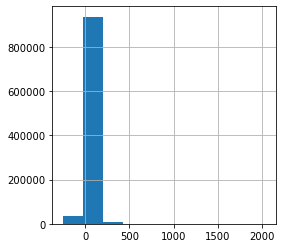

In [68]:
#check for normal distribution
data.arr_delay.hist(figsize=(4,4))
plt.show()

### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [80]:
# Connect to flight database via postgress
con = psycopg2.connect(
    host ="mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com",
    port = 5432,
    user = "lhl_student",
    password = "lhl_student",
    database =  'mid_term_project'
)

sql = 'SELECT taxi_in,taxi_out,crs_dep_time,crs_arr_time FROM flights ORDER BY RANDOM() LIMIT 100000;'
data_taxi = pd.read_sql_query(sql,con)
con.close()

KeyboardInterrupt: 

In [106]:
data_taxi.head()

,taxi_in,taxi_out,crs_dep_time,crs_arr_time
0,3.0,9.0,1420,1542
1,4.0,11.0,820,1021
2,2.0,8.0,1420,1610
3,10.0,10.0,1255,1425
4,6.0,19.0,805,1028


No handles with labels found to put in legend.


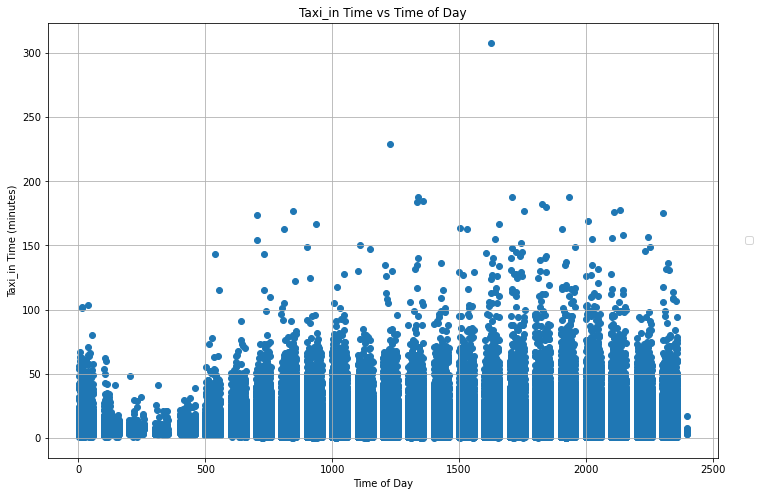

In [108]:
# ARRIVAL TIME VS TAXI TIME
# set figure size
plt.rcParams["figure.figsize"] = (12,8)
# plot clusters
plt.scatter(data_taxi['crs_arr_time'],
            data_taxi['taxi_in'],
            )


plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.xlabel('Time of Day')
plt.ylabel('Taxi_in Time (minutes)')
plt.title('Taxi_in Time vs Time of Day')
plt.grid()
plt.show()

Above visualisation shows significantly lower taxi_in times earlier on in the day, implies addition of taxi_in times as a feature could improve model accuracy. Addition of taxi_out times could also be included but see task 5 logic: airlines are able to compensate by lowering delays during flight.

Below visualisation shows similar findings from taxi_out times.

No handles with labels found to put in legend.


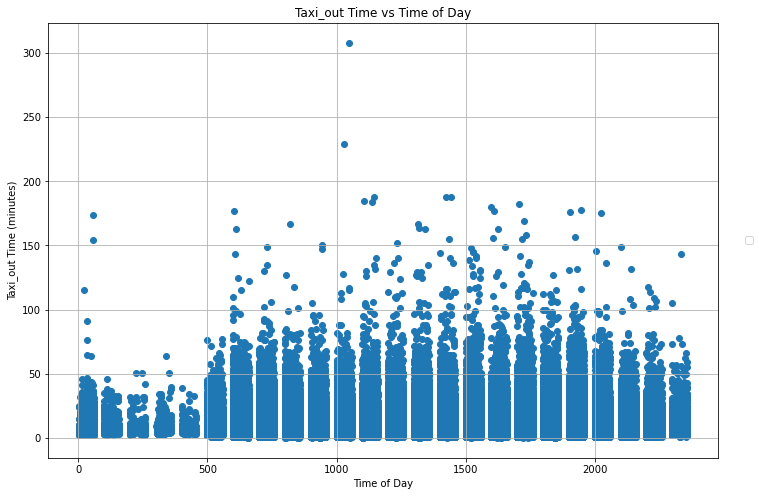

In [109]:
# ARRIVAL TIME VS TAXI TIME
# set figure size
plt.rcParams["figure.figsize"] = (12,8)
# plot clusters
plt.scatter(data_taxi['crs_dep_time'],
            data_taxi['taxi_in'],
            )


plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.xlabel('Time of Day')
plt.ylabel('Taxi_out Time (minutes)')
plt.title('Taxi_out Time vs Time of Day')
plt.grid()
plt.show()

### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [155]:
data_delays = data[['fl_date','op_unique_carrier','arr_delay','dep_delay']]
data_delays = data_delays.groupby(by = 'op_unique_carrier').mean()
data_delays.reset_index(inplace = True)
data_delays.columns = ['op_carrier','avg_arr_delay','avg_dep_delay']

#Export as csv 
data_delays.to_csv(path_or_buf = '~/Bootcamp/MIDTERM PROJECT/carrier_delays.csv')


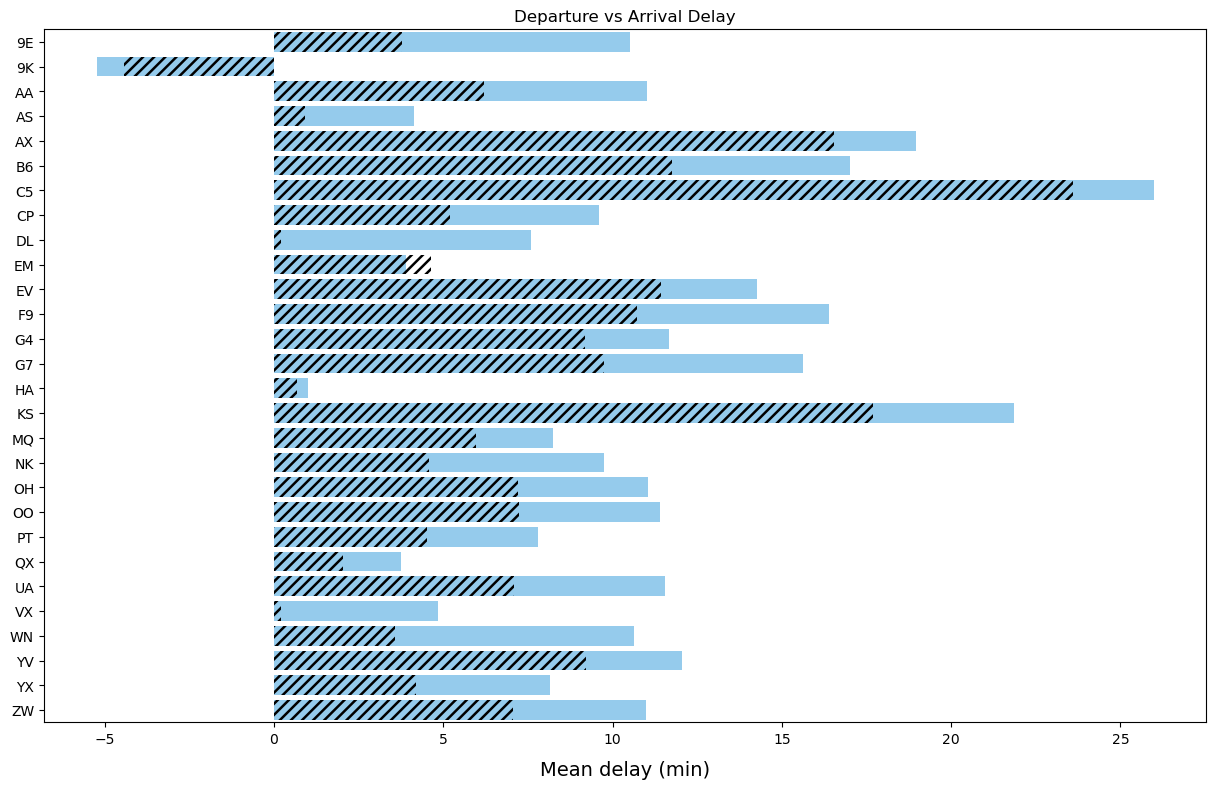

In [150]:
#PLOT AVERAGE ARRIVAL AND DEPARTURE DELAYS
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.8  

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="avg_dep_delay", y="op_carrier", data=data_delays, color="lightskyblue", ci=None)
ax = sns.barplot(x="avg_arr_delay", y="op_carrier", data=data_delays, color="r", hatch = '///', alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay')
plt.xlabel('Mean delay (min)', fontsize=14, labelpad=10);